In [24]:
import pandas as pd
import numpy as np

In [25]:
vimana_df = pd.read_csv('vimana.csv')

In [26]:
vimana_df.head(6)

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403
5,6,371


In [27]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
Month     37 non-null int64
demand    37 non-null int64
dtypes: int64(2)
memory usage: 672.0 bytes


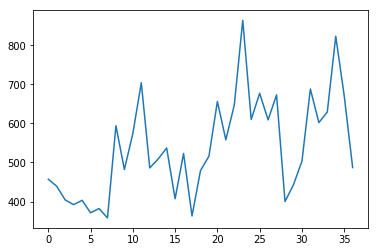

In [29]:
import matplotlib.pyplot as plt
plt.plot(vimana_df['demand'])

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(vimana_df.demand, lags=20)

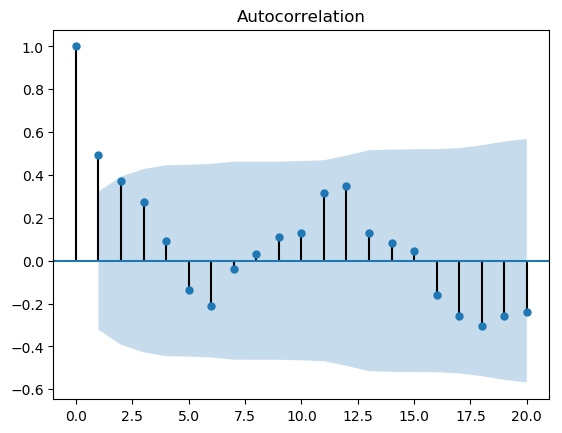

In [6]:
acf_plot

The shaded area represents the upper and lower bounds for critical values, where the null hypotesis can not be rejected. Null hypothesis is rejected only for lag 1.  

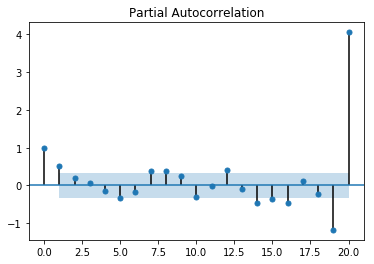

In [8]:
pacf_plot = plot_pacf(vimana_df.demand, lags=20)
#pacf_plot

So for lag=1, the partial acf is signicant.
In the above case, based on ACS and PACF plots, AR(1) can be used.

# AR

In [12]:
#p, d, q 1, 0, 0
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).as_matrix(), order=(1,0,0))
ar_model = arima.fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3

In [13]:
ar_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 375.7336
Dependent Variable: y                Log-Likelihood:      -182.77 
Date:               2020-02-01 03:04 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 106.593 
No. Iterations:     14.0000          HQIC:                372.875 
AIC:                371.5300                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       513.4433   35.9147  14.2962  0.0000  443.0519  583.8348
ar.L1.y       0.4726    0.1576   2.9995  0.0056    0.1638    0.7814
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.1161             0.0000           2.1161             0.0000
==================================================================

"""

The model summary indicates that AR with lag 1 is significant variables in the model. P-value is less than 0.05(0.0056)

# MA

In [15]:
#p,d,q 0,0,1
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).as_matrix(), order=(0,0,1))
ma_model = arima.fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [17]:
ma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 378.7982
Dependent Variable: y                Log-Likelihood:      -184.30 
Date:               2020-02-01 03:13 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 112.453 
No. Iterations:     15.0000          HQIC:                375.939 
AIC:                374.5946                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       516.5439   26.8307  19.2520  0.0000  463.9568  569.1311
ma.L1.y       0.3173    0.1421   2.2327  0.0337    0.0388    0.5958
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
MA.1           -3.1518            0.0000          3.1518            0.5000
==================================================================

"""

as per the model summary, moving average with lag 1 is statisticlly significant as the p-value is less than 0.05(.0337). 

# ARMA - Model can be used only when time series data is statioanary

In [18]:
#p,d,q 1,0,1
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).as_matrix(), order=(1,0,1))
arma_model = arima.fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [19]:
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 377.2964
Dependent Variable: y                Log-Likelihood:      -181.85 
Date:               2020-02-01 03:18 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           3                Sample:              0       
Df Residuals:       27                                    0       
Converged:          1.0000           S.D. of innovations: 103.223 
No. Iterations:     21.0000          HQIC:                373.485 
AIC:                371.6916                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       508.3985   45.3280  11.2160  0.0000  419.5572  597.2398
ar.L1.y       0.7421    0.1681   4.4158  0.0001    0.4127    1.0715
ma.L1.y      -0.3394    0.2070  -1.6401  0.1126   -0.7451    0.0662
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.3475             0.0000           1.3475             0.0000
MA.1          2.9461             0.0000           2.9461             0.0000
==================================================================

"""

p-value is greater than 0.05(.1126).

In [21]:
#p,d,q 1,1,1
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).as_matrix(), order=(1,1,1))
arima_model = arima.fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [22]:
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:              ARIMA            BIC:                 367.8521
Dependent Variable: D.y              Log-Likelihood:      -177.19 
Date:               2020-02-01 03:22 Scale:               1.0000  
No. Observations:   29               Method:              css-mle 
Df Model:           3                Sample:              1       
Df Residuals:       26                                    0       
Converged:          1.0000           S.D. of innovations: 108.453 
No. Iterations:     23.0000          HQIC:                364.096 
AIC:                362.3829                                      
-------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         -0.1041   12.5860  -0.0083  0.9935  -24.7721  24.5640
ar.L1.D.y     -0.3450    0.2964  -1.1639  0.2550   -0.9260   0.2360
ma.L1.D.y     -0.1779    0.2984  -0.5962  0.5562   -0.7628   0.4070
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
AR.1           -2.8985            0.0000          2.8985            0.5000
MA.1            5.6206            0.0000          5.6206            0.0000
==================================================================

"""

p-value is greater than 0.05(.5562)